<font size="+3.8">Scanpy single-cell pre-processing</font>  
<font size="+1.5"></font>  

sfrerich

Aim: Preprocess mouse brain single-cell data from the Tabula Muris Senis Dataset (2020 Nature)  
Publication: http://www.nature.com/articles/s41586-020-2496-1

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import os
from datetime import date
from matplotlib.pyplot import rc_context

In [2]:
sc.settings.verbosity = 3

In [3]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux

In [4]:
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win

# Load data

Downloaded from: https://figshare.com/articles/dataset/Tabula_Muris_Senis_Data_Objects/12654728 02/03/2023

## Myeloid dataset

In [9]:
# myeloid
ad = sc.read_h5ad(main_dir+"\\P6_vasc_scRNAseq\TabulaMurisSenis2020\\tabula-muris-senis-facs-processed-official-annotations-Brain_Myeloid.h5ad")
ad

D:\Programme\Anaconda\envs\squidpy\lib\site-packages\anndata\compat\__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
D:\Programme\Anaconda\envs\squidpy\lib\site-packages\anndata\compat\__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 13417 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [10]:
ad.obs.head()

FACS.selection  age         cell  \
index                                                                     
A10_B001060_B009250_S214.mm10-plus-1-0      Microglia  18m  A10_B001060   
A10_B001061_B009251_S298.mm10-plus-1-0      Microglia  18m  A10_B001061   
A10_B002503_B009456_S10.mm10-plus-1-0       Microglia  18m  A10_B002503   
A10_B002702_B009296_S154.mm10-plus-1-0      Microglia  18m  A10_B002702   
A10_D045853_B009304_S106.mm10-plus-1-0      Microglia  18m  A10_D045853   

                                       cell_ontology_class cell_ontology_id  \
index                                                                         
A10_B001060_B009250_S214.mm10-plus-1-0     microglial cell              nan   
A10_B001061_B009251_S298.mm10-plus-1-0     microglial cell              nan   
A10_B002503_B009456_S10.mm10-plus-1-0      microglial cell              nan   
A10_B002702_B009296_S154.mm10-plus-1-0     microglial cell              nan   
A10_D045853_B009304_S106.mm10-plus-1-0     microglial cell              nan   

                                       free_annotation method mouse.id  \
index                                                                    
A10_B001060_B009250_S214.mm10-plus-1-0             nan   facs  18_47_F   
A10_B001061_B009251_S298.mm10-plus-1-0             nan   facs  18_46_F   
A10_B002503_B009456_S10.mm10-plus-1-0              nan   facs  18_45_M   
A10_B002702_B009296_S154.mm10-plus-1-0             nan   facs  18_53_M   
A10_D045853_B009304_S106.mm10-plus-1-0             nan   facs  18_46_F   

                                           sex    subtissue         tissue  \
index                                                                        
A10_B001060_B009250_S214.mm10-plus-1-0  female  Cerebellum   Brain_Myeloid   
A10_B001061_B009251_S298.mm10-plus-1-0  female  Cerebellum   Brain_Myeloid   
A10_B002503_B009456_S10.mm10-plus-1-0     male  Cerebellum   Brain_Myeloid   
A10_B002702_B009296_S154.mm10-plus-1-0    male  Cerebellum   Brain_Myeloid   
A10_D045853_B009304_S106.mm10-plus-1-0  female      Cortex   Brain_Myeloid   

                                        n_genes   n_counts louvain leiden  
index                                                                      
A10_B001060_B009250_S214.mm10-plus-1-0     1505   389331.0      11     15  
A10_B001061_B009251_S298.mm10-plus-1-0     2384   387020.0      13     13  
A10_B002503_B009456_S10.mm10-plus-1-0       599  1090999.0       0      5  
A10_B002702_B009296_S154.mm10-plus-1-0     1547   728701.0       9      6  
A10_D045853_B009304_S106.mm10-plus-1-0      931    90912.0      11     19

In [11]:
pd.value_counts(ad.obs["cell_ontology_class"])

microglial cell    13130
macrophage           287
Name: cell_ontology_class, dtype: int64

In [12]:
new_names = {
    'Microglia/Macrophages': {'microglial cell','macrophage'},
}
result = {}
for key, value in new_names.items():
    for elem in value:
        result[(elem)] = key
new_cluster_names = dict(sorted(result.items()))
print(new_cluster_names)

{'macrophage': 'Microglia/Macrophages', 'microglial cell': 'Microglia/Macrophages'}


In [13]:
ad.obs['clusters'] = (
    ad.obs['cell_ontology_class']
    .map(new_cluster_names)
    .astype('category')
)

In [14]:
pd.value_counts(ad.obs["clusters"])

Microglia/Macrophages    13417
Name: clusters, dtype: int64

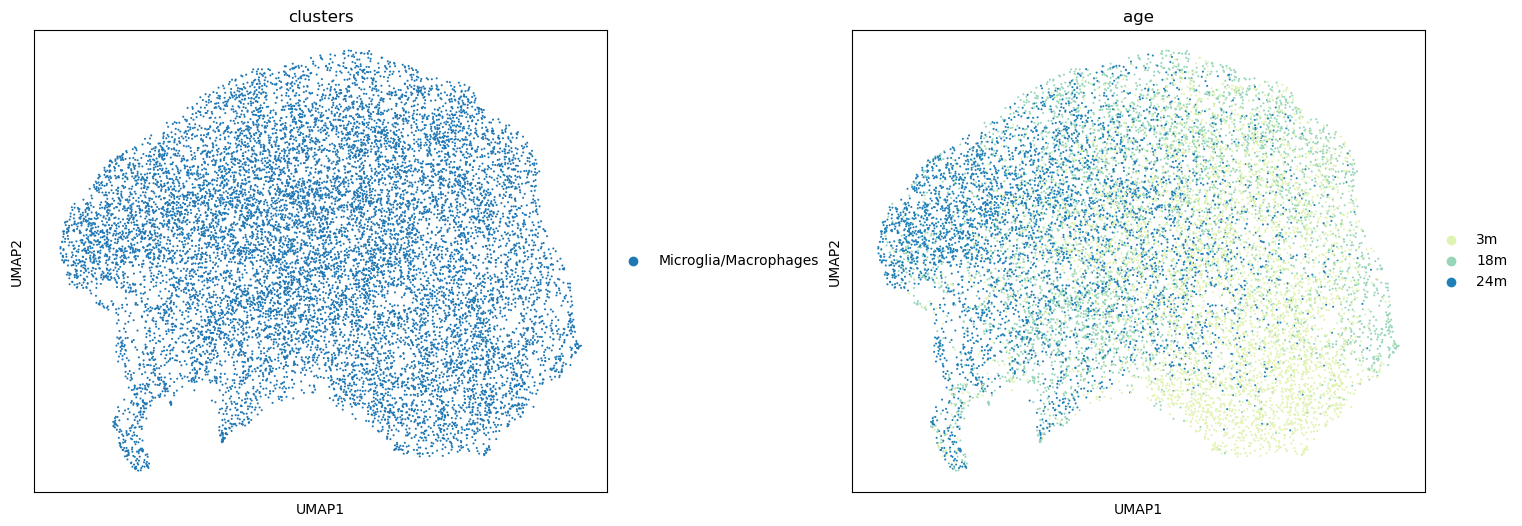

In [16]:
with rc_context({'figure.figsize': (7, 6)}):
    sc.pl.umap(ad, color=['clusters','age'], wspace=0.3)

Check if data is normalized:

In [17]:
ad.layers

Layers with keys: 

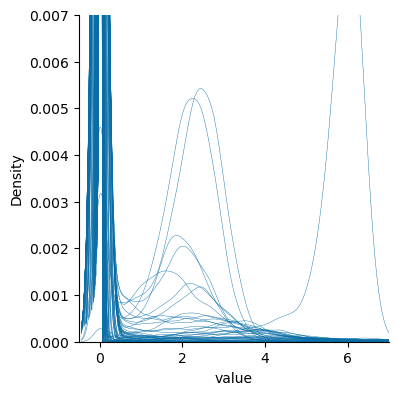

In [18]:
# show expression of 100 random genes (across all spots)
import random
import seaborn as sns
random_genes=random.sample(range(0, ad.X.shape[1]), 100)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(adata_sub.X.todense())
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007));
plt.show()

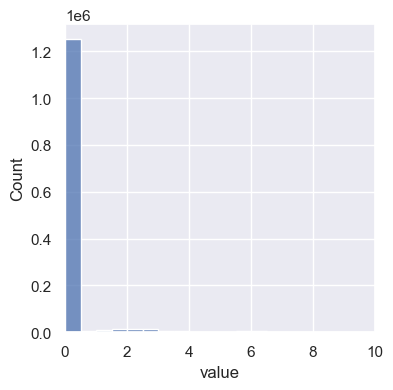

In [19]:
sns.set(rc={'figure.figsize':(4,4)})
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))
pl.set(xlim=(0, 10));
sns.set_style("ticks")
plt.show()

In [20]:
adata_sub.X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Data seems to be normalized

In [21]:
ad.layers["normalized"] = ad.X.copy() # save normalized + log-transformed (but unscaled) counts - retrieve via adata.X = adata.layers["normalized"]

In [22]:
ad

AnnData object with n_obs × n_vars = 13417 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca', 'clusters_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [23]:
ad.layers

Layers with keys: normalized

In [24]:
adm = ad

In [25]:
del ad

## Non-myeloid dataset

In [26]:
ad = sc.read_h5ad(main_dir+"\\P6_vasc_scRNAseq\TabulaMurisSenis2020\\tabula-muris-senis-facs-processed-official-annotations-Brain_Non-Myeloid.h5ad")
ad

D:\Programme\Anaconda\envs\squidpy\lib\site-packages\anndata\compat\__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
D:\Programme\Anaconda\envs\squidpy\lib\site-packages\anndata\compat\__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 7249 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [27]:
ad.obs.head()

FACS.selection  age         cell  \
index                                                                     
C4_B001059_B009342_S52.mm10-plus-0-0          Neurons  18m   C4_B001059   
E10_B001059_B009342_S106.mm10-plus-0-0        Neurons  18m  E10_B001059   
E22_B001059_B009342_S118.mm10-plus-0-0        Neurons  18m  E22_B001059   
F5_B001059_B009342_S125.mm10-plus-0-0         Neurons  18m   F5_B001059   
G18_B001059_B009342_S162.mm10-plus-0-0        Neurons  18m  G18_B001059   

                                                    cell_ontology_class  \
index                                                                     
C4_B001059_B009342_S52.mm10-plus-0-0                    oligodendrocyte   
E10_B001059_B009342_S106.mm10-plus-0-0                  oligodendrocyte   
E22_B001059_B009342_S118.mm10-plus-0-0  CD8-positive, alpha-beta T cell   
F5_B001059_B009342_S125.mm10-plus-0-0                   oligodendrocyte   
G18_B001059_B009342_S162.mm10-plus-0-0                  microglial cell   

                                       cell_ontology_id free_annotation  \
index                                                                     
C4_B001059_B009342_S52.mm10-plus-0-0                nan             nan   
E10_B001059_B009342_S106.mm10-plus-0-0              nan             nan   
E22_B001059_B009342_S118.mm10-plus-0-0              nan             nan   
F5_B001059_B009342_S125.mm10-plus-0-0               nan             nan   
G18_B001059_B009342_S162.mm10-plus-0-0              nan             nan   

                                       method mouse.id     sex  subtissue  \
index                                                                       
C4_B001059_B009342_S52.mm10-plus-0-0     facs  18_46_F  female  Striatum    
E10_B001059_B009342_S106.mm10-plus-0-0   facs  18_46_F  female  Striatum    
E22_B001059_B009342_S118.mm10-plus-0-0   facs  18_46_F  female  Striatum    
F5_B001059_B009342_S125.mm10-plus-0-0    facs  18_46_F  female  Striatum    
G18_B001059_B009342_S162.mm10-plus-0-0   facs  18_46_F  female  Striatum    

                                                   tissue  n_genes  \
index                                                                
C4_B001059_B009342_S52.mm10-plus-0-0    Brain_Non-Myeloid     2754   
E10_B001059_B009342_S106.mm10-plus-0-0  Brain_Non-Myeloid     2701   
E22_B001059_B009342_S118.mm10-plus-0-0  Brain_Non-Myeloid     1969   
F5_B001059_B009342_S125.mm10-plus-0-0   Brain_Non-Myeloid     1542   
G18_B001059_B009342_S162.mm10-plus-0-0  Brain_Non-Myeloid      605   

                                          n_counts louvain leiden  
index                                                              
C4_B001059_B009342_S52.mm10-plus-0-0    53326296.0       3      7  
E10_B001059_B009342_S106.mm10-plus-0-0   8818237.0       3      7  
E22_B001059_B009342_S118.mm10-plus-0-0   3267551.0      15     18  
F5_B001059_B009342_S125.mm10-plus-0-0   31601112.0       3      7  
G18_B001059_B009342_S162.mm10-plus-0-0     75163.0       9      8

In [28]:
pd.value_counts(ad.obs["cell_ontology_class"])

endothelial cell                   2232
oligodendrocyte                    2094
astrocyte                           592
brain pericyte                      484
neuron                              484
oligodendrocyte precursor cell      312
interneuron                         240
neuroepithelial cell                151
microglial cell                     138
CD8-positive, alpha-beta T cell     104
medium spiny neuron                 103
neuronal stem cell                   97
T cell                               67
ependymal cell                       55
Bergmann glial cell                  54
macrophage                           25
mature NK T cell                     17
Name: cell_ontology_class, dtype: int64

In [29]:
new_names = {
    'Endothelial cells': {'endothelial cell'},
    'Oligos': {'oligodendrocyte'},
    'Astrocytes': {'astrocyte','Bergmann glial cell'},
    'Pericytes': {'brain pericyte'},
    'Neurons': {'neuron','interneuron', 'medium spiny neuron'},
    'OPCs': {'oligodendrocyte precursor cell'},
    'Neuroepithelial cells': {'neuroepithelial cell'},
    'Microglia/Macrophages': {'microglial cell','macrophage'},
    'Neuronal stem cells': {'neuronal stem cell'},
    'Ependymal cells': {'ependymal cell'},
    'NK/T cells': {'mature NK T cell','T cell', 'CD8-positive, alpha-beta T cell'},
}
result = {}
for key, value in new_names.items():
    for elem in value:
        result[(elem)] = key
new_cluster_names = dict(sorted(result.items()))
print(new_cluster_names)

{'Bergmann glial cell': 'Astrocytes', 'CD8-positive, alpha-beta T cell': 'NK/T cells', 'T cell': 'NK/T cells', 'astrocyte': 'Astrocytes', 'brain pericyte': 'Pericytes', 'endothelial cell': 'Endothelial cells', 'ependymal cell': 'Ependymal cells', 'interneuron': 'Neurons', 'macrophage': 'Microglia/Macrophages', 'mature NK T cell': 'NK/T cells', 'medium spiny neuron': 'Neurons', 'microglial cell': 'Microglia/Macrophages', 'neuroepithelial cell': 'Neuroepithelial cells', 'neuron': 'Neurons', 'neuronal stem cell': 'Neuronal stem cells', 'oligodendrocyte': 'Oligos', 'oligodendrocyte precursor cell': 'OPCs'}


In [30]:
ad.obs['clusters'] = (
    ad.obs['cell_ontology_class']
    .map(new_cluster_names)
    .astype('category')
)

In [31]:
pd.value_counts(ad.obs["clusters"])

Endothelial cells        2232
Oligos                   2094
Neurons                   827
Astrocytes                646
Pericytes                 484
OPCs                      312
NK/T cells                188
Microglia/Macrophages     163
Neuroepithelial cells     151
Neuronal stem cells        97
Ependymal cells            55
Name: clusters, dtype: int64

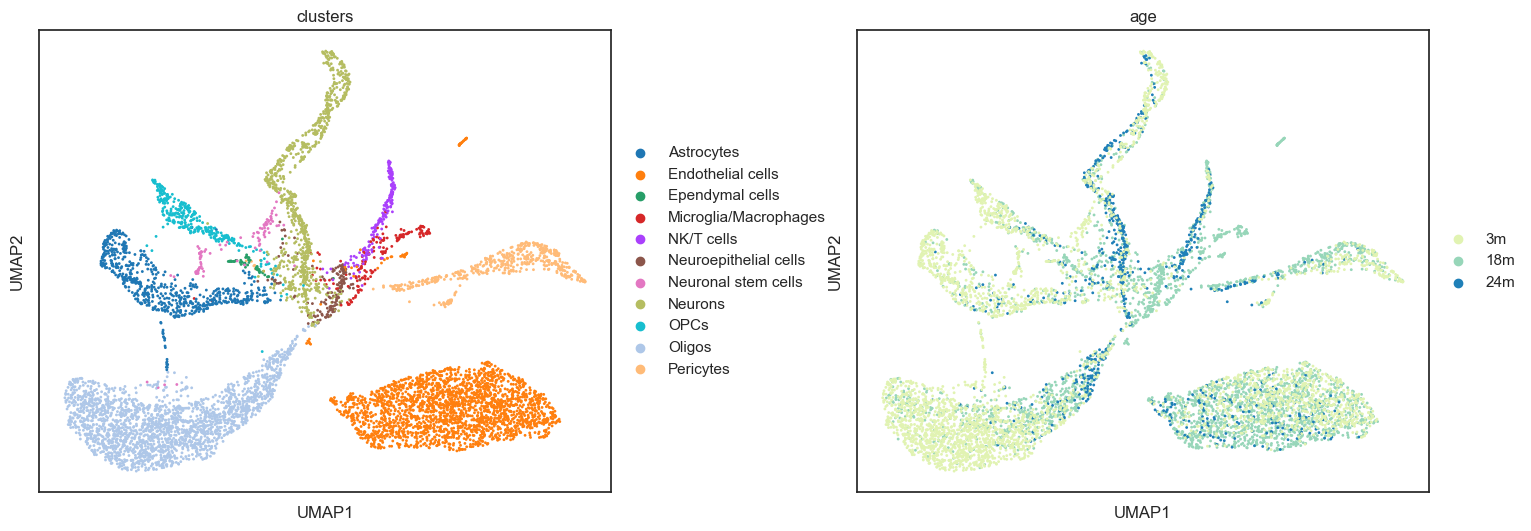

In [32]:
with rc_context({'figure.figsize': (7, 6)}):
    sc.pl.umap(ad, color=['clusters','age'], wspace=0.3)

No SMCs?

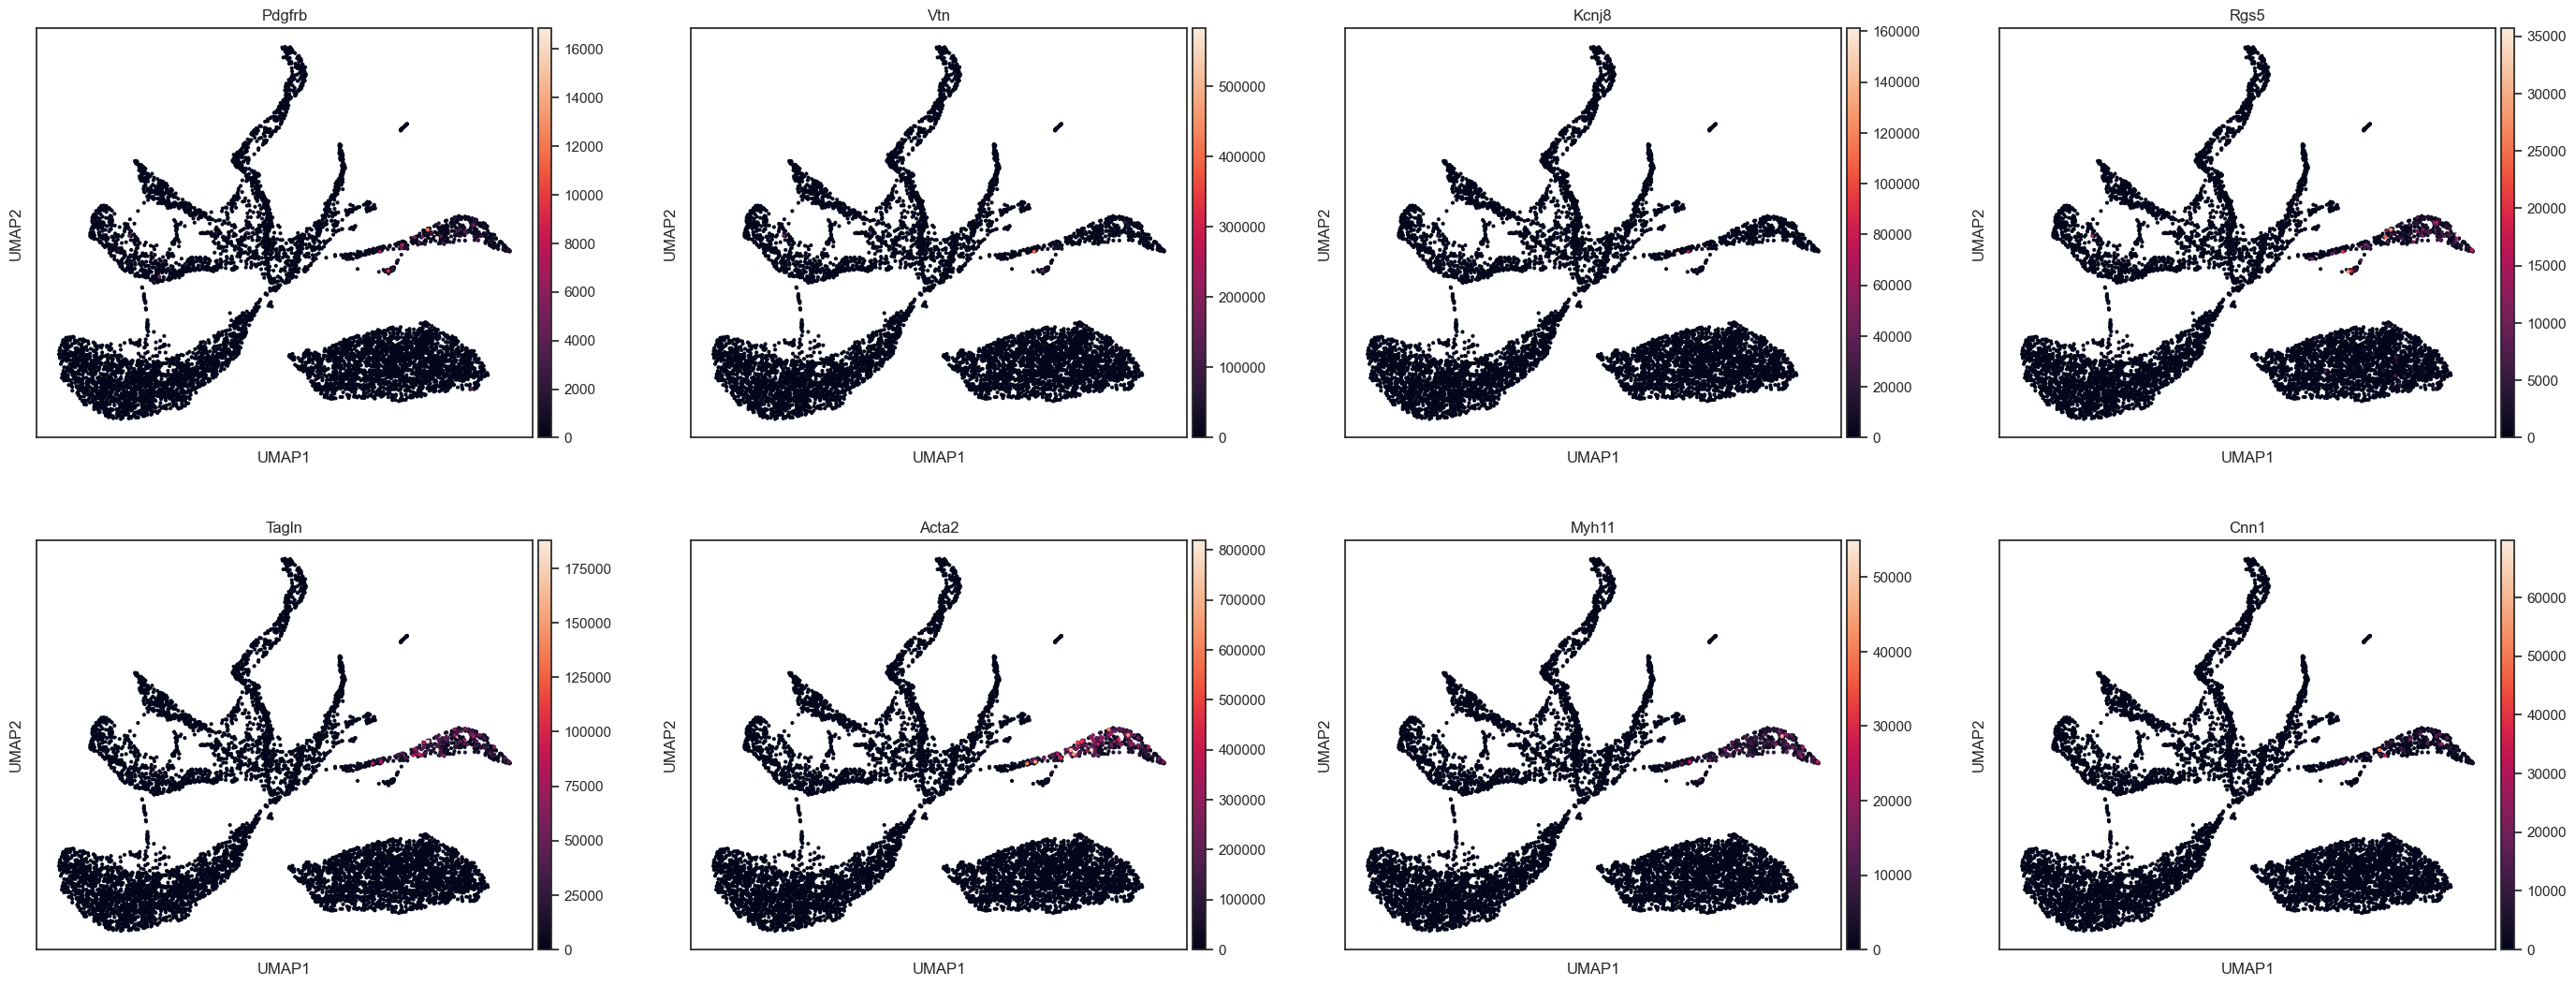

In [33]:
with rc_context({'figure.figsize': (7, 6)}):
    sc.pl.umap(ad, color=['Pdgfrb','Vtn','Kcnj8','Rgs5','Tagln','Acta2','Myh11','Cnn1'], wspace=0.2, size=35)

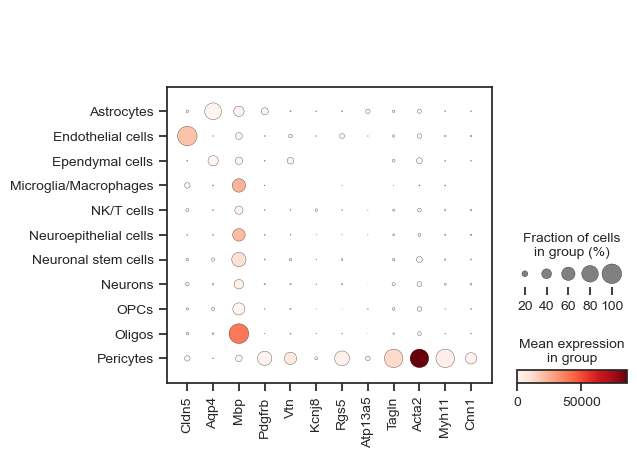

In [34]:
sc.pl.dotplot(ad, var_names=['Cldn5',"Aqp4","Mbp",'Pdgfrb','Vtn','Kcnj8','Rgs5','Atp13a5','Tagln','Acta2','Myh11','Cnn1'], groupby="clusters", swap_axes=False);

Last 4 cols are SMC markers

Mural cell signature is ambigous.

Re-cluster to separate PCs and SMCs:

In [35]:
sc.tl.leiden(ad, resolution=2)

running Leiden clustering
    finished: found 40 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


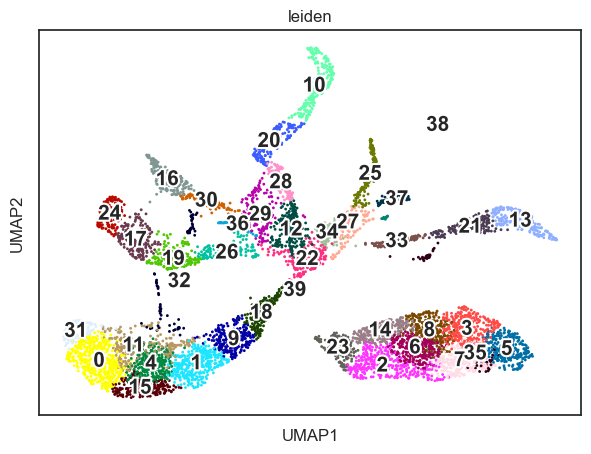

In [36]:
with rc_context({'figure.figsize': (7, 5)}):
    sc.pl.umap(ad, color=['leiden'],legend_loc="on data", legend_fontoutline=3,legend_fontsize=15)

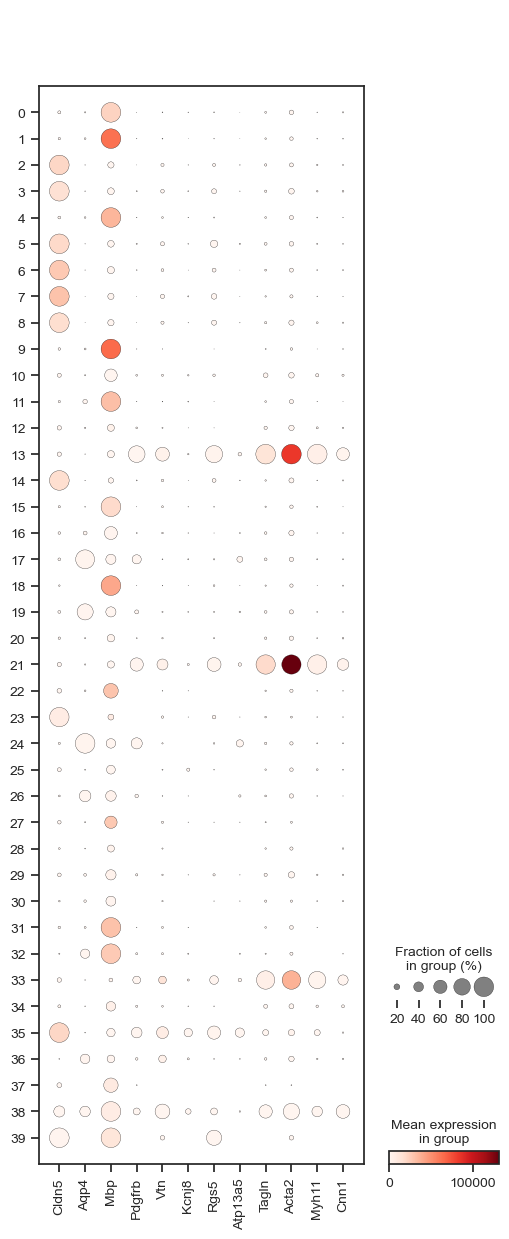

In [37]:
sc.pl.dotplot(ad, var_names=['Cldn5',"Aqp4","Mbp",'Pdgfrb','Vtn','Kcnj8','Rgs5','Atp13a5','Tagln','Acta2','Myh11','Cnn1'], groupby="leiden", swap_axes=False);

Note: Still no PC signature. Likely few PCs in dataset.  
Rename "Pericytes" to "SMCs/Pericytes"

In [38]:
new_names = {
    'Endothelial cells': {'Endothelial cells'},
    'Oligos': {'Oligos'},
    'Astrocytes': {'Astrocytes'},
    'SMCs/Pericytes': {'Pericytes'},
    'Neurons': {'Neurons'},
    'OPCs': {'OPCs'},
    'Neuroepithelial cells': {'Neuroepithelial cells'},
    'Microglia': {'Microglia'},
    'Neuronal stem cells': {'Neuronal stem cells'},
    'Ependymal cells': {'Ependymal cells'},
    'Macrophages': {'Macrophages'},
    'NK/T cells': {'NK/T cells'},
}
result = {}
for key, value in new_names.items():
    for elem in value:
        result[(elem)] = key
new_cluster_names = dict(sorted(result.items()))
print(new_cluster_names)

{'Astrocytes': 'Astrocytes', 'Endothelial cells': 'Endothelial cells', 'Ependymal cells': 'Ependymal cells', 'Macrophages': 'Macrophages', 'Microglia': 'Microglia', 'NK/T cells': 'NK/T cells', 'Neuroepithelial cells': 'Neuroepithelial cells', 'Neuronal stem cells': 'Neuronal stem cells', 'Neurons': 'Neurons', 'OPCs': 'OPCs', 'Oligos': 'Oligos', 'Pericytes': 'SMCs/Pericytes'}


In [39]:
ad.obs['clusters'] = (
    ad.obs['clusters']
    .map(new_cluster_names)
    .astype('category')
)

Check if data is normalized:

In [40]:
ad.layers

Layers with keys: 

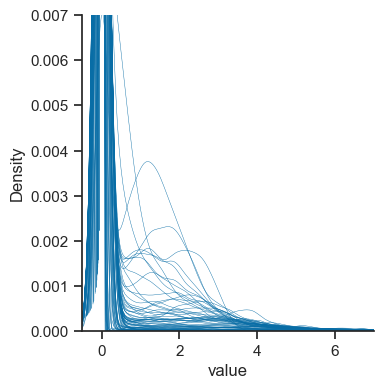

In [41]:
# show expression of 100 random genes (across all spots)
import random
import seaborn as sns
random_genes=random.sample(range(0, ad.X.shape[1]), 100)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(adata_sub.X.todense())
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007));
plt.show()

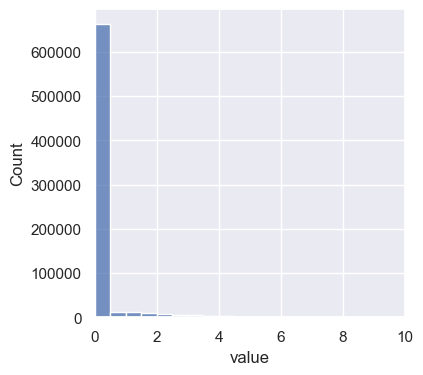

In [42]:
sns.set(rc={'figure.figsize':(4,4)})
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))
pl.set(xlim=(0, 10));
sns.set_style("ticks")
plt.show()

In [43]:
adata_sub.X.todense()

matrix([[0.       , 0.       , 0.       , ..., 0.       , 2.501423 ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 2.29426  ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 2.3522668,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 1.4384421,
         4.9384284]], dtype=float32)

Data seems to be normalized

In [44]:
ad.layers["normalized"] = ad.X.copy() # save normalized + log-transformed (but unscaled) counts - retrieve via adata.X = adata.layers["normalized"]

In [45]:
ad

AnnData object with n_obs × n_vars = 7249 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca', 'clusters_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'normalized'
    obsp: 'distances', 'connectivities'

In [46]:
ad.layers

Layers with keys: normalized

In [47]:
adnm = ad

In [48]:
del ad

## Merge

In [49]:
del adata_sub
del random_genes

In [50]:
# merge winkler datasets
adata = anndata.concat([adnm, adm], join="inner") # ignore batch effects etc. because dataset is pre-annotated
adata

AnnData object with n_obs × n_vars = 20666 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'normalized'

In [51]:
pd.value_counts(adata.obs["age"])

3m     7974
18m    7512
24m    5180
Name: age, dtype: int64

In [52]:
pd.value_counts(adata.obs["clusters"])

Microglia/Macrophages    13417
Endothelial cells         2232
Oligos                    2094
Neurons                    827
Astrocytes                 646
SMCs/Pericytes             484
OPCs                       312
NK/T cells                 188
Neuroepithelial cells      151
Neuronal stem cells         97
Ependymal cells             55
Name: clusters, dtype: int64

In [53]:
pd.value_counts(adata.obs["sex"])

male      13271
female     7395
Name: sex, dtype: int64

In [54]:
pd.value_counts(adata.obs["mouse.id"])

18_46_F    2317
18_47_F    2118
3_10_M     2016
18_45_M    1842
24_60_M    1814
3_9_M      1558
3_38_F     1470
24_58_M    1314
18_53_M    1235
3_8_M      1188
24_59_M    1126
3_39_F     1090
24_61_M     926
3_56_F      400
3_11_M      252
Name: mouse.id, dtype: int64

# Focus on: Foxf2

In [55]:
gene="Foxf2"

## Plot

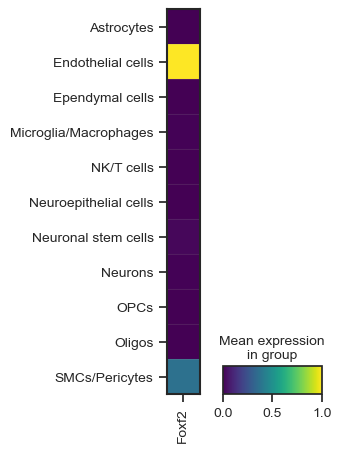

In [56]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

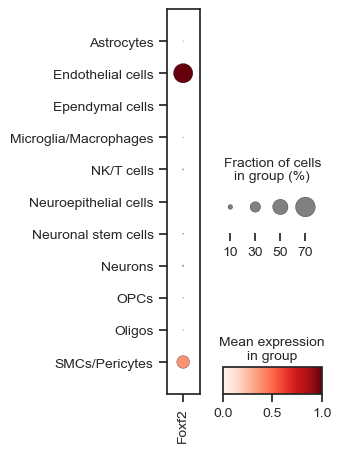

In [57]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

In [58]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                              
Astrocytes                    0.000401
Endothelial cells             1.000000
Ependymal cells               0.000000
Microglia/Macrophages         0.006409
NK/T cells                    0.003011
Neuroepithelial cells         0.000000
Neuronal stem cells           0.018664
Neurons                       0.005609
OPCs                          0.001964
Oligos                        0.000608
SMCs/Pericytes                0.369789

In [59]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                                
Astrocytes                      0.004644
Endothelial cells               0.683244
Ependymal cells                 0.000000
Microglia/Macrophages           0.004621
NK/T cells                      0.015957
Neuroepithelial cells           0.000000
Neuronal stem cells             0.010309
Neurons                         0.020556
OPCs                            0.006410
Oligos                          0.005731
SMCs/Pericytes                  0.390496

In [60]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "TabulaMurisSenis2020"
foxf2['organism'] = "Mouse"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene  \
clusters                                                           
Astrocytes                    0.000401           0.004644  Foxf2   
Endothelial cells             1.000000           0.683244  Foxf2   
Ependymal cells               0.000000           0.000000  Foxf2   
Microglia/Macrophages         0.006409           0.004621  Foxf2   
NK/T cells                    0.003011           0.015957  Foxf2   
Neuroepithelial cells         0.000000           0.000000  Foxf2   
Neuronal stem cells           0.018664           0.010309  Foxf2   
Neurons                       0.005609           0.020556  Foxf2   
OPCs                          0.001964           0.006410  Foxf2   
Oligos                        0.000608           0.005731  Foxf2   
SMCs/Pericytes                0.369789           0.390496  Foxf2   

                                     source organism  cell_number  
clusters                                                           
Astrocytes             TabulaMurisSenis2020    Mouse          646  
Endothelial cells      TabulaMurisSenis2020    Mouse         2232  
Ependymal cells        TabulaMurisSenis2020    Mouse           55  
Microglia/Macrophages  TabulaMurisSenis2020    Mouse        13417  
NK/T cells             TabulaMurisSenis2020    Mouse          188  
Neuroepithelial cells  TabulaMurisSenis2020    Mouse          151  
Neuronal stem cells    TabulaMurisSenis2020    Mouse           97  
Neurons                TabulaMurisSenis2020    Mouse          827  
OPCs                   TabulaMurisSenis2020    Mouse          312  
Oligos                 TabulaMurisSenis2020    Mouse         2094  
SMCs/Pericytes         TabulaMurisSenis2020    Mouse          484

In [61]:
# export
name='TabulaMurisSenis2020'

In [62]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+name+'_normalized.csv',sep=';')

# Focus on: Other genes

## Foxo1

In [63]:
gene="Foxo1"

### Plot

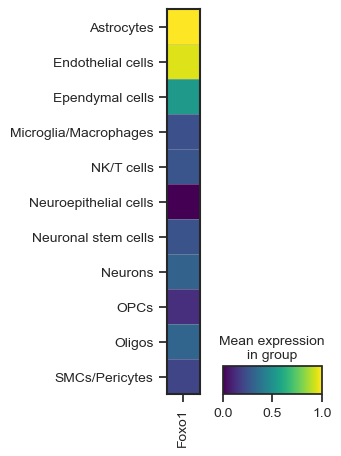

In [64]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

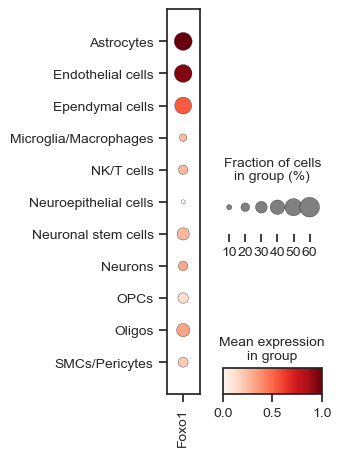

In [65]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

In [66]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                              
Astrocytes                    1.000000
Endothelial cells             0.948250
Ependymal cells               0.541477
Microglia/Macrophages         0.244865
NK/T cells                    0.260765
Neuroepithelial cells         0.000000
Neuronal stem cells           0.256633
Neurons                       0.315026
OPCs                          0.135506
Oligos                        0.321751
SMCs/Pericytes                0.203936

In [67]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                                
Astrocytes                      0.527864
Endothelial cells               0.521057
Ependymal cells                 0.490909
Microglia/Macrophages           0.163449
NK/T cells                      0.223404
Neuroepithelial cells           0.072848
Neuronal stem cells             0.319588
Neurons                         0.227328
OPCs                            0.259615
Oligos                          0.351480
SMCs/Pericytes                  0.239669

In [68]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "TabulaMurisSenis2020"
foxf2['organism'] = "Mouse"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene  \
clusters                                                           
Astrocytes                    1.000000           0.527864  Foxo1   
Endothelial cells             0.948250           0.521057  Foxo1   
Ependymal cells               0.541477           0.490909  Foxo1   
Microglia/Macrophages         0.244865           0.163449  Foxo1   
NK/T cells                    0.260765           0.223404  Foxo1   
Neuroepithelial cells         0.000000           0.072848  Foxo1   
Neuronal stem cells           0.256633           0.319588  Foxo1   
Neurons                       0.315026           0.227328  Foxo1   
OPCs                          0.135506           0.259615  Foxo1   
Oligos                        0.321751           0.351480  Foxo1   
SMCs/Pericytes                0.203936           0.239669  Foxo1   

                                     source organism  cell_number  
clusters                                                           
Astrocytes             TabulaMurisSenis2020    Mouse          646  
Endothelial cells      TabulaMurisSenis2020    Mouse         2232  
Ependymal cells        TabulaMurisSenis2020    Mouse           55  
Microglia/Macrophages  TabulaMurisSenis2020    Mouse        13417  
NK/T cells             TabulaMurisSenis2020    Mouse          188  
Neuroepithelial cells  TabulaMurisSenis2020    Mouse          151  
Neuronal stem cells    TabulaMurisSenis2020    Mouse           97  
Neurons                TabulaMurisSenis2020    Mouse          827  
OPCs                   TabulaMurisSenis2020    Mouse          312  
Oligos                 TabulaMurisSenis2020    Mouse         2094  
SMCs/Pericytes         TabulaMurisSenis2020    Mouse          484

In [69]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

## Tek = Tie2

In [70]:
gene="Tek"

### Plot

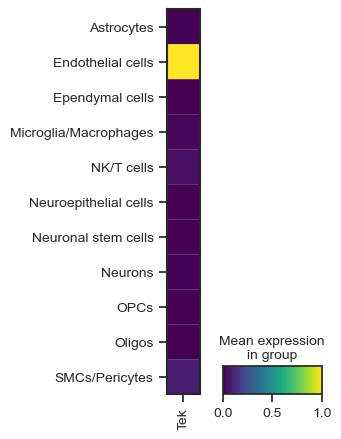

In [71]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

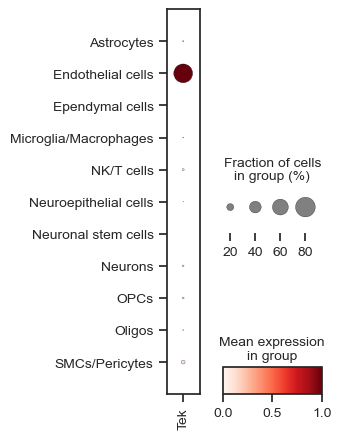

In [72]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

In [73]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                              
Astrocytes                    0.007184
Endothelial cells             1.000000
Ependymal cells               0.000000
Microglia/Macrophages         0.016719
NK/T cells                    0.037681
Neuroepithelial cells         0.000597
Neuronal stem cells           0.000000
Neurons                       0.007165
OPCs                          0.002743
Oligos                        0.000295
SMCs/Pericytes                0.075376

In [74]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                                
Astrocytes                      0.020124
Endothelial cells               0.754928
Ependymal cells                 0.000000
Microglia/Macrophages           0.012298
NK/T cells                      0.037234
Neuroepithelial cells           0.006623
Neuronal stem cells             0.000000
Neurons                         0.029021
OPCs                            0.032051
Oligos                          0.013372
SMCs/Pericytes                  0.088843

In [75]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "TabulaMurisSenis2020"
foxf2['organism'] = "Mouse"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells gene  \
clusters                                                         
Astrocytes                    0.007184           0.020124  Tek   
Endothelial cells             1.000000           0.754928  Tek   
Ependymal cells               0.000000           0.000000  Tek   
Microglia/Macrophages         0.016719           0.012298  Tek   
NK/T cells                    0.037681           0.037234  Tek   
Neuroepithelial cells         0.000597           0.006623  Tek   
Neuronal stem cells           0.000000           0.000000  Tek   
Neurons                       0.007165           0.029021  Tek   
OPCs                          0.002743           0.032051  Tek   
Oligos                        0.000295           0.013372  Tek   
SMCs/Pericytes                0.075376           0.088843  Tek   

                                     source organism  cell_number  
clusters                                                           
Astrocytes             TabulaMurisSenis2020    Mouse          646  
Endothelial cells      TabulaMurisSenis2020    Mouse         2232  
Ependymal cells        TabulaMurisSenis2020    Mouse           55  
Microglia/Macrophages  TabulaMurisSenis2020    Mouse        13417  
NK/T cells             TabulaMurisSenis2020    Mouse          188  
Neuroepithelial cells  TabulaMurisSenis2020    Mouse          151  
Neuronal stem cells    TabulaMurisSenis2020    Mouse           97  
Neurons                TabulaMurisSenis2020    Mouse          827  
OPCs                   TabulaMurisSenis2020    Mouse          312  
Oligos                 TabulaMurisSenis2020    Mouse         2094  
SMCs/Pericytes         TabulaMurisSenis2020    Mouse          484

In [76]:
# export
name='TabulaMurisSenis2020'

In [77]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

## Nos3 = eNOS

In [78]:
gene="Nos3"

### Plot

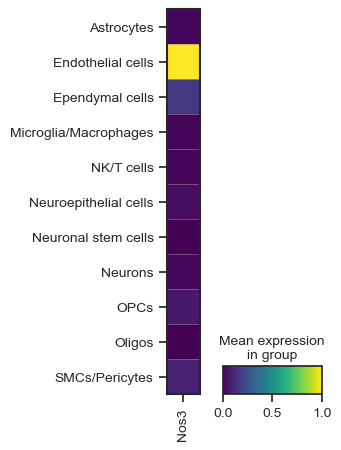

In [79]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

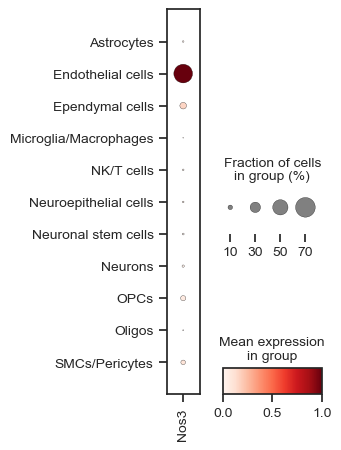

In [80]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

In [81]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                              
Astrocytes                    0.015126
Endothelial cells             1.000000
Ependymal cells               0.160962
Microglia/Macrophages         0.012622
NK/T cells                    0.013746
Neuroepithelial cells         0.033127
Neuronal stem cells           0.001044
Neurons                       0.021750
OPCs                          0.063509
Oligos                        0.000000
SMCs/Pericytes                0.096688

In [82]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                                
Astrocytes                      0.024768
Endothelial cells               0.655018
Ependymal cells                 0.163636
Microglia/Macrophages           0.008199
NK/T cells                      0.026596
Neuroepithelial cells           0.026490
Neuronal stem cells             0.030928
Neurons                         0.041112
OPCs                            0.118590
Oligos                          0.012894
SMCs/Pericytes                  0.101240

In [83]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "TabulaMurisSenis2020"
foxf2['organism'] = "Mouse"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells  gene  \
clusters                                                          
Astrocytes                    0.015126           0.024768  Nos3   
Endothelial cells             1.000000           0.655018  Nos3   
Ependymal cells               0.160962           0.163636  Nos3   
Microglia/Macrophages         0.012622           0.008199  Nos3   
NK/T cells                    0.013746           0.026596  Nos3   
Neuroepithelial cells         0.033127           0.026490  Nos3   
Neuronal stem cells           0.001044           0.030928  Nos3   
Neurons                       0.021750           0.041112  Nos3   
OPCs                          0.063509           0.118590  Nos3   
Oligos                        0.000000           0.012894  Nos3   
SMCs/Pericytes                0.096688           0.101240  Nos3   

                                     source organism  cell_number  
clusters                                                           
Astrocytes             TabulaMurisSenis2020    Mouse          646  
Endothelial cells      TabulaMurisSenis2020    Mouse         2232  
Ependymal cells        TabulaMurisSenis2020    Mouse           55  
Microglia/Macrophages  TabulaMurisSenis2020    Mouse        13417  
NK/T cells             TabulaMurisSenis2020    Mouse          188  
Neuroepithelial cells  TabulaMurisSenis2020    Mouse          151  
Neuronal stem cells    TabulaMurisSenis2020    Mouse           97  
Neurons                TabulaMurisSenis2020    Mouse          827  
OPCs                   TabulaMurisSenis2020    Mouse          312  
Oligos                 TabulaMurisSenis2020    Mouse         2094  
SMCs/Pericytes         TabulaMurisSenis2020    Mouse          484

In [84]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

# Focus on: Aging

In [85]:
pd.value_counts(adata.obs["age"])

3m     7974
18m    7512
24m    5180
Name: age, dtype: int64

## Foxf2 by age group

In [86]:
gene=["Foxf2","Foxo1","Tek","Nos3"]

### All cell types

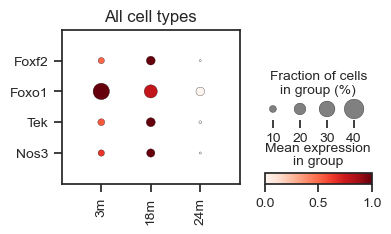

In [87]:
sc.pl.dotplot(adata, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="All cell types")

### ECs only

In [88]:
# ECs only
adata_ecs = adata[adata.obs['clusters'].isin(['Endothelial cells'])]
adata_ecs

View of AnnData object with n_obs × n_vars = 2232 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'normalized'

In [89]:
pd.value_counts(adata_ecs.obs["age"])

18m    1358
3m      723
24m     151
Name: age, dtype: int64

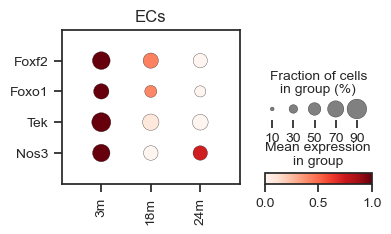

In [90]:
sc.pl.dotplot(adata_ecs, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="ECs")

### SMCs/PCs only

Liekly PCs + SMCs (see above)

In [91]:
adata_pcs = adata[adata.obs['clusters'].isin(['SMCs/Pericytes'])]
pd.value_counts(adata_pcs.obs["age"])

18m    265
3m     179
24m     40
Name: age, dtype: int64

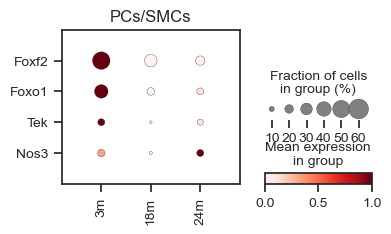

In [92]:
sc.pl.dotplot(adata_pcs, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="PCs/SMCs")

### Neurons only

In [93]:
adata_neur = adata[adata.obs['clusters'].isin(['Neurons'])]
pd.value_counts(adata_neur.obs["age"])

3m     326
24m    269
18m    232
Name: age, dtype: int64

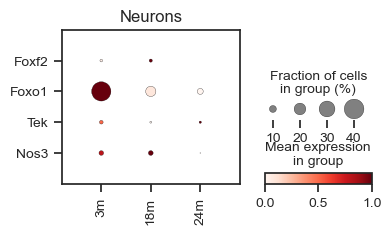

In [94]:
sc.pl.dotplot(adata_neur, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="Neurons")

### Astrocytes only

In [95]:
adata_astro = adata[adata.obs['clusters'].isin(['Astrocytes'])]
pd.value_counts(adata_astro.obs["age"])

3m     485
18m    121
24m     40
Name: age, dtype: int64

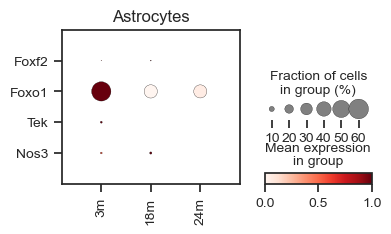

In [96]:
sc.pl.dotplot(adata_astro, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="Astrocytes")

### Oligos only

In [97]:
adata_olig = adata[adata.obs['clusters'].isin(['Oligos'])]
pd.value_counts(adata_olig.obs["age"])

3m     1396
18m     564
24m     134
Name: age, dtype: int64

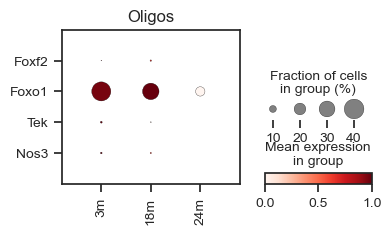

In [98]:
sc.pl.dotplot(adata_olig, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="Oligos")

### Microglia only

In [103]:
adata_mg = adata[adata.obs['clusters'].isin(['Microglia/Macrophages'])]
pd.value_counts(adata_mg.obs["age"])

3m     4532
18m    4461
24m    4424
Name: age, dtype: int64

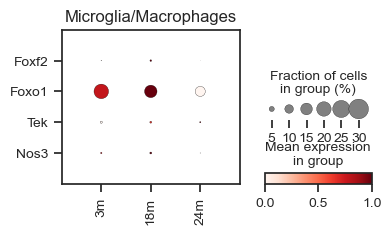

In [104]:
sc.pl.dotplot(adata_mg, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="Microglia/Macrophages")

## Correlate gene expression (Foxf2 and Foxo1)

### ECs

In [105]:
gg = ["Foxf2","Foxo1"]

In [106]:
adata

AnnData object with n_obs × n_vars = 20666 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'normalized'

In [107]:
adata_ecs

View of AnnData object with n_obs × n_vars = 2232 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'normalized'

In [108]:
adat = adata_ecs
subs = adat[:,gg].X.todense()
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)
subs.head()

Foxf2     Foxo1  age
index                                                          
A10_B001365_B009253_S166.mm10-plus-1-0  1.997677  0.079579  18m
A10_B002338_B009294_S286.mm10-plus-1-0  3.947012  0.000000  18m
A10_B002341_B009297_S238.mm10-plus-1-0  0.000000  0.023411  18m
A10_B002507_B009457_S94.mm10-plus-1-0   0.011226  0.000000  18m
A11_B001363_B009260_S251.mm10-plus-1-0  1.399394  0.408589  18m

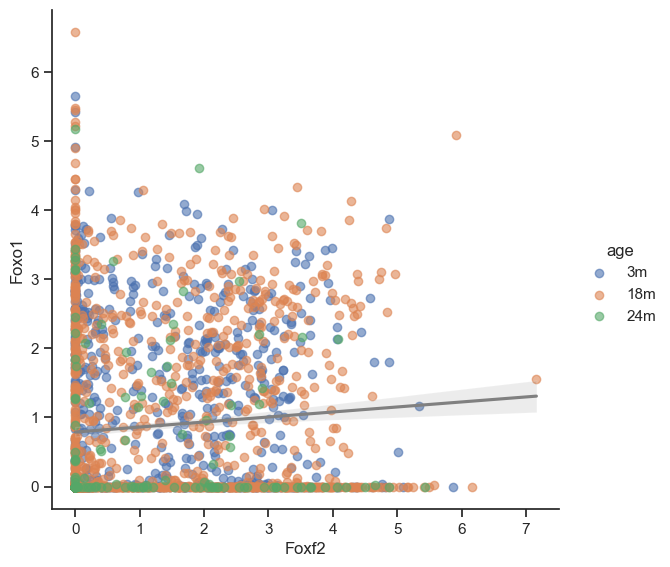

In [109]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

In [110]:
import scipy as sp
r, p = sp.stats.pearsonr(subs['Foxf2'], subs['Foxo1'])
'Pearson R = {:.2f}, p = {:.2g}'.format(r, p)

'Pearson R = 0.08, p = 6.7e-05'

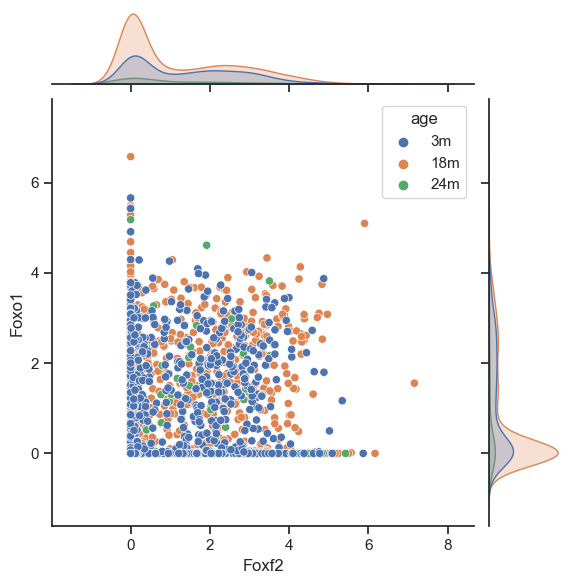

In [111]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

Exclude dropouts (cells with 0 expression of both genes)

In [112]:
coex = (adata_ecs[:,'{}'.format("Foxf2")].X.todense() > 0) | (adata_ecs[:,'{}'.format("Foxo1")].X.todense() > 0)

In [113]:
adata_ecs_above0 = adata_ecs[coex]
adata_ecs_above0

View of AnnData object with n_obs × n_vars = 1804 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'normalized'

In [114]:
pd.value_counts(adata_ecs_above0.obs["age"])

18m    1048
3m      646
24m     110
Name: age, dtype: int64

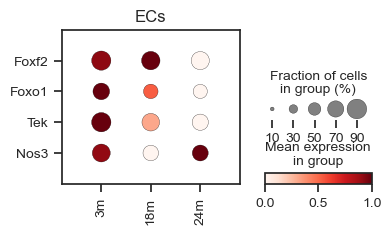

In [115]:
sc.pl.dotplot(adata_ecs_above0, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized", title="ECs")

In [116]:
adat = adata_ecs_above0
subs = adat[:,gg].X.todense()
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)

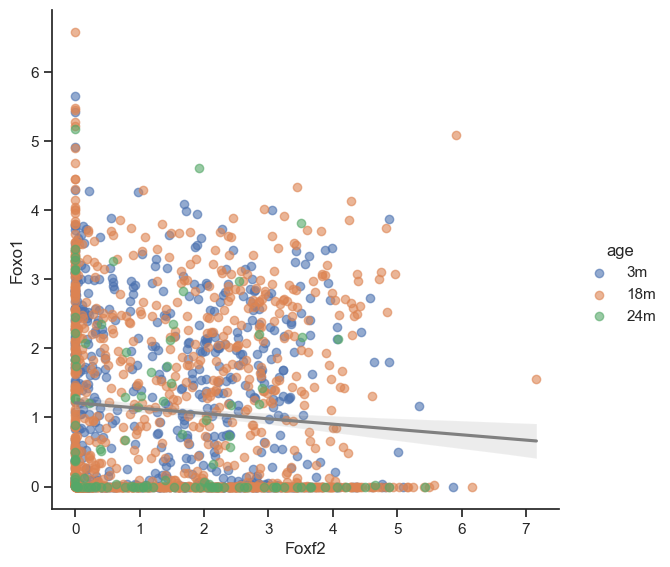

In [117]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

In [118]:
r, p = sp.stats.pearsonr(subs['Foxf2'], subs['Foxo1'])
'Pearson R = {:.2f}, p = {:.2g}'.format(r, p)

'Pearson R = -0.09, p = 0.00026'

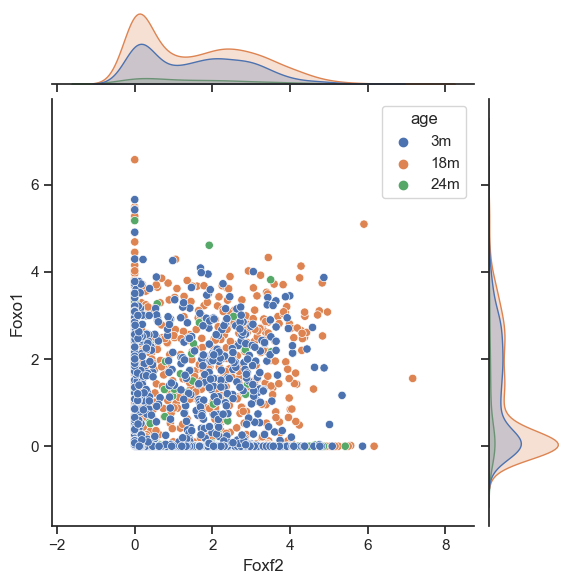

In [119]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

### All cell types

In [120]:
gg = ["Foxf2","Foxo1"]

In [121]:
adata

AnnData object with n_obs × n_vars = 20666 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'normalized'

In [122]:
adat = adata
subs = adat[:,gg].X.todense()
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)
subs.head()

Foxf2  Foxo1  age
index                                                    
C4_B001059_B009342_S52.mm10-plus-0-0      0.0    0.0  18m
E10_B001059_B009342_S106.mm10-plus-0-0    0.0    0.0  18m
E22_B001059_B009342_S118.mm10-plus-0-0    0.0    0.0  18m
F5_B001059_B009342_S125.mm10-plus-0-0     0.0    0.0  18m
G18_B001059_B009342_S162.mm10-plus-0-0    0.0    0.0  18m

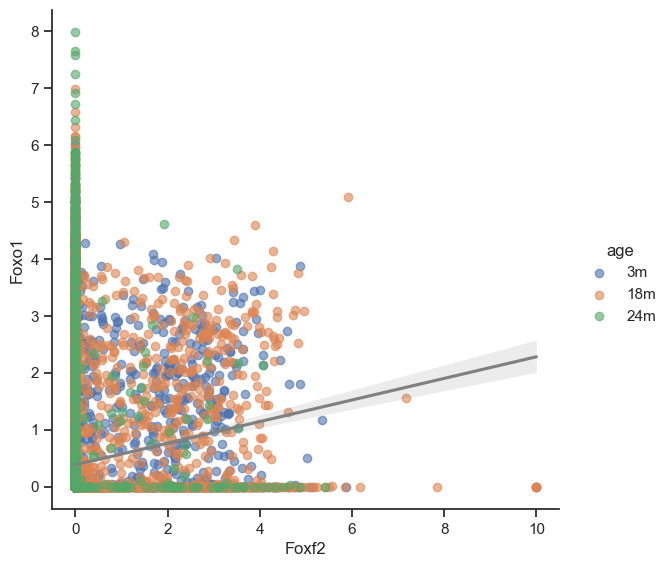

In [123]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

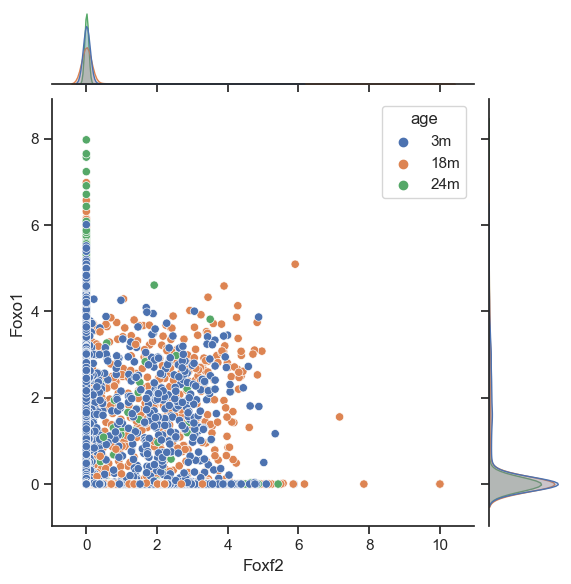

In [124]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

Exclude dropouts (cells with 0 expression of both genes)

In [125]:
coex = (adat[:,'{}'.format("Foxf2")].X.todense() > 0) | (adat[:,'{}'.format("Foxo1")].X.todense() > 0)

In [126]:
adata_above0 = adat[coex]
adata_above0

View of AnnData object with n_obs × n_vars = 5784 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'normalized'

In [127]:
pd.value_counts(adata_above0.obs["age"])

3m     2752
18m    2291
24m     741
Name: age, dtype: int64

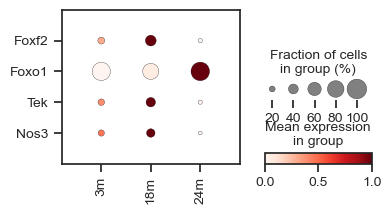

In [128]:
sc.pl.dotplot(adata_above0, gene, groupby='age', swap_axes=True, figsize=(4,2), standard_scale="var", layer="normalized")

In [129]:
adat = adata_above0
subs = adat[:,gg].X.todense()
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)

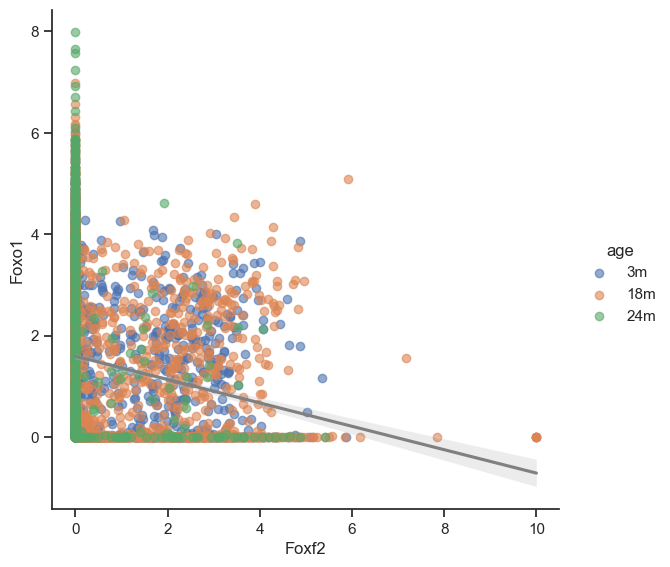

In [130]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

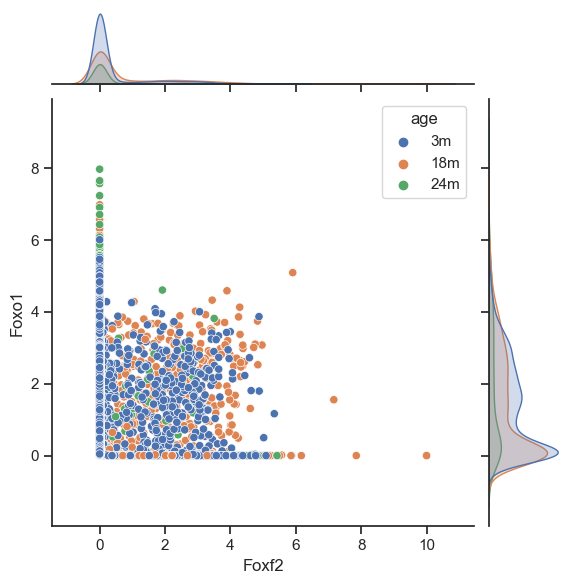

In [131]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

## Pseudobulk analysis

Because correlation on single cell level is biased by large number of dropouts

In [132]:
import decoupler as dc

In [135]:
adata

AnnData object with n_obs × n_vars = 20666 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden', 'clusters'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'normalized'

In [ ]:
padata = dc.get_pseudobulk(adata, sample_col='mouse.id', groups_col='clusters', layer='normalized', min_prop=0.2, min_smpls=3)

In [ ]:
padata

### Correlate gene expression (Foxf2 and Foxo1)

#### All cell types

In [435]:
gg = ["Foxf2","Foxo1"]

In [436]:
padata

View of AnnData object with n_obs × n_vars = 99 × 11119
    obs: 'age', 'method', 'mouse.id', 'sex', 'clusters'

In [437]:
adat = padata
subs = adat[:,gg].X
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)
subs.head()

Foxf2      Foxo1  age
18_45_M_Astrocytes    0.0  13.668764  18m
18_46_F_Astrocytes    0.0  25.138191  18m
18_47_F_Astrocytes    0.0  20.848482  18m
18_53_M_Astrocytes    0.0   6.485300  18m
24_60_M_Astrocytes    0.0  22.926723  24m

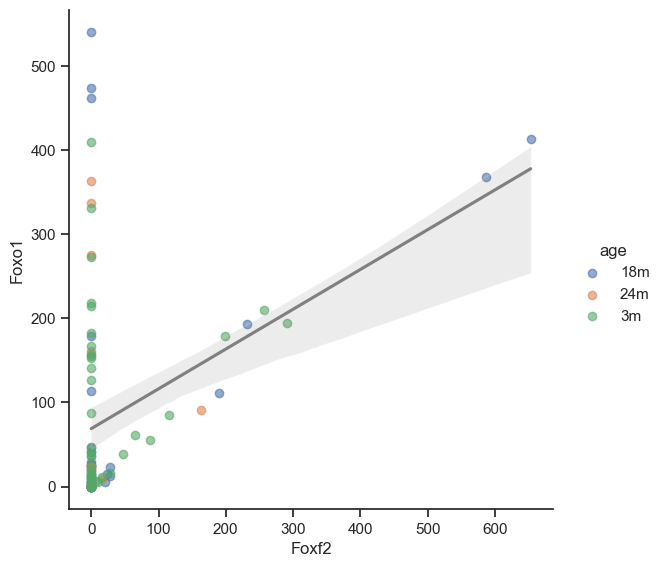

In [438]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

In [439]:
import scipy as sp
r, p = sp.stats.pearsonr(subs['Foxf2'], subs['Foxo1'])
'Pearson R = {:.2f}, p = {:.2g}'.format(r, p)

'Pearson R = 0.38, p = 0.0001'

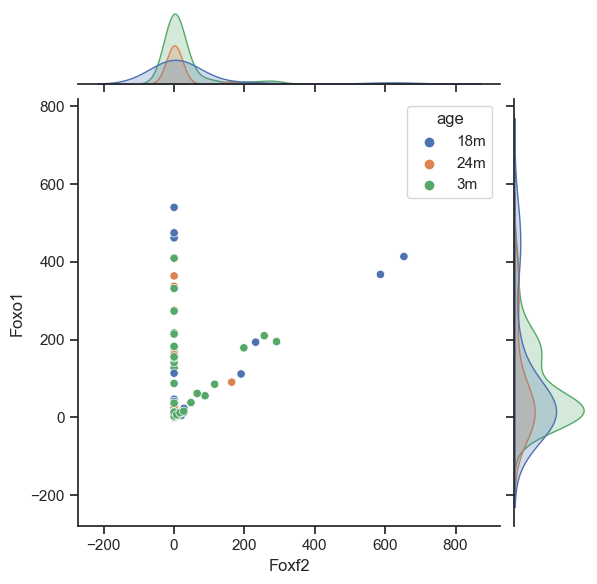

In [440]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

#### ECs

In [441]:
# ECs only
padata_ecs = padata[padata.obs['clusters'].isin(['Endothelial cells'])]
padata_ecs

View of AnnData object with n_obs × n_vars = 11 × 11119
    obs: 'age', 'method', 'mouse.id', 'sex', 'clusters'

In [442]:
gg = ["Foxf2","Foxo1"]

In [443]:
adat = padata_ecs
subs = adat[:,gg].X
subs = pd.DataFrame(subs, columns = gg, index=adat.obs.index)
age = pd.DataFrame(adat.obs["age"])
subs = subs.join(age)
subs.head()

Foxf2       Foxo1  age
18_45_M_Endothelial cells  231.783752  193.502060  18m
18_46_F_Endothelial cells  653.067993  413.760712  18m
18_47_F_Endothelial cells  586.387817  367.688873  18m
18_53_M_Endothelial cells  190.408615  111.714127  18m
24_60_M_Endothelial cells  163.653305   90.555946  24m

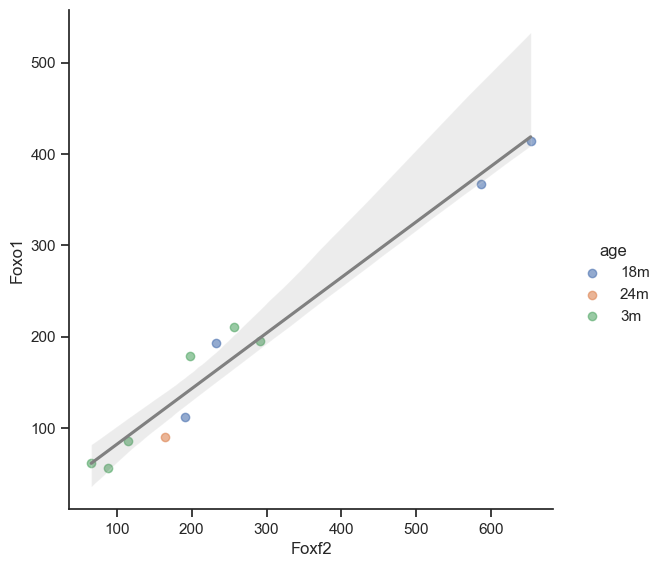

In [444]:
g = sns.lmplot(x="Foxf2", y="Foxo1", data=subs, hue="age", fit_reg=False, scatter_kws={'alpha':0.6})
sns.regplot(x="Foxf2", y="Foxo1", data=subs, scatter=False, ax=g.axes[0, 0], color="grey")
g.figure.set_size_inches(7,6)
plt.show()

In [445]:
import scipy as sp
r, p = sp.stats.pearsonr(subs['Foxf2'], subs['Foxo1'])
'Pearson R = {:.2f}, p = {:.2g}'.format(r, p)

'Pearson R = 0.98, p = 1.2e-07'

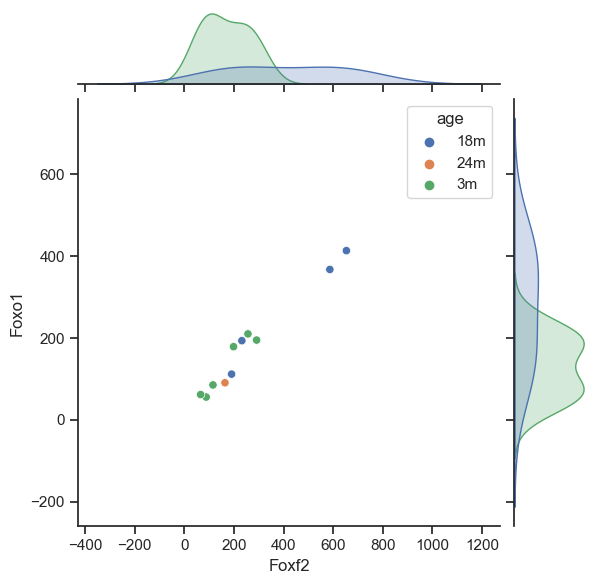

In [446]:
graph = sns.jointplot(data=subs, x="Foxf2", y="Foxo1", hue="age")
plt.show()

# Session Info

In [447]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asciitree                   NA
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
cffi                        1.15.1
cloudpickle                 2.0.0
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dask                        2022.05.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
decoupler                   1.1.0
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
fasteners                   0.17.3
fsspec                      2022.3.0
h5py                        3.6.0
hypergeom_ufunc             NA
igraph                      0.9.10
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.7.0
jedi    